In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup

## Импорт и предобработка данных

In [2]:
# создадим функцию импорта данных:

def import_data(link, name):
    sheet_id = link
    sheet_name = name
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    name = pd.read_csv(url)
    return name

# импортируем датафреймы:

flights = import_data('1y9hU3YhRlz95VPwY4xF-7na0PJ2oO_0JZ8E0MxzAvPY', 'flights')
city = import_data('1ojWYlStcPITiqrwP5sVC6O6DbHfOg1-pWDUT5AyjUgY', 'city')

В данном разделе будет рассмотрена **общая информация** о датафреймах. Для начала необходимо посмотреть первые 5 строк каждого датафрейма, чтобы определить, с информацией какого рода будет происходить исследование

In [4]:
display(flights.head())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
display(city.head())

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Также, для ознакомительного анализа, необходимо изучить числовые параметры

In [6]:
flights.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [7]:
city.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Помимо прочего, необходимо установить, какие типы данных присутствуют в датафреймах

In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [9]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Также исследую датафремы на **пропуски**

In [10]:
flights.isnull().sum()

model             0
flights_amount    0
dtype: int64

In [11]:
city.isnull().sum()

city               0
average_flights    0
dtype: int64

Пропусков не обнаружено

Для дальнейшего исследования создан срез **10 городов с наибольшим количеством прибывающих рейсов** и сохранен в новый датафрейм top10:

In [12]:
top10 = city.sort_values(by = 'average_flights', ascending = False).head(10)
top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


**Вывод**:

Датафрейм 'flights' содержит информацию о модели самолета и количестве рейсов на каждой модели самолёта.Всего 8 моделей самолетов. В среднем каждая модель самолета выполнила 2035.63 полета. Минимальное количество полетов - 300, максимальное - 4557. Содержит в себе 2 колонки и 8 строк. Колонка 'model' принадлежит к типу даных 'object', т.к. содержит информацию о названиях моделей самолетов. Колонка 'flights_amount' - тип 'int64' с информацией о количестве рейсов на каждой модели.

В датафрейме 'city' содержатся данные о городе и среднее количество прибывающих рейсов в день для каждого города. В список городов включено 101 наименование. Среднее количество прибывающих рейсов в каждый город от 1 до почти 130 в день. Также содержит 2 колонки и 101 строку. Колонка 'city', соответственно, содержит названия городов и принадлежит к типу 'object'. Колонка 'average_flights' содержит информацию о среднем количестве прибывающих рейсов в день для каждого города, данные в ней принадлежат к типу 'float64'.

Также стоит отметить, что в вышеуказанных датафреймах отсутствуют пропущенные значения.

Типы данных корректны, замена не требуется. 

Для дальнейшего анализа был создан датафрейм 'top10' со срезом данных о 10 городах с наибольшим количеством прибывающих рейсов.

## Исследовательский анализ данных

Следующим этапом исследование станет изучение спроса пассажиров на рейсы в города, где проходят крупнейшие фестивали. Для этого необходимо изучить предпочтения пользователей, покупающих билеты на те или иные направления.

### Сравнительный анализ количества рейсов в разрезе каждой модели самолета

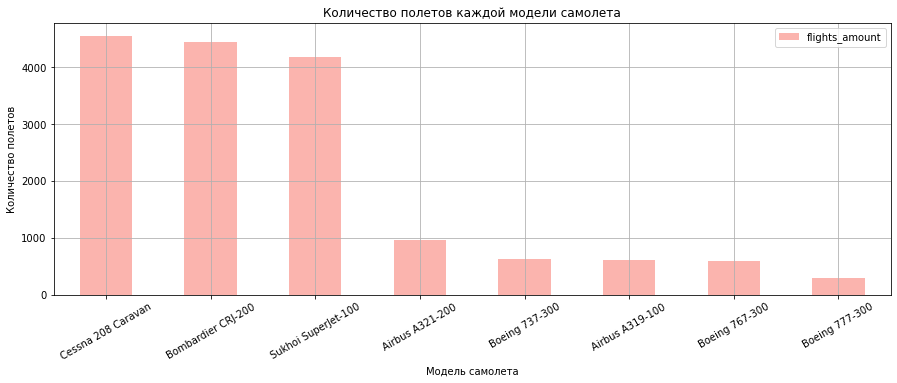

In [13]:
flights.sort_values(by = 'flights_amount', ascending = False). plot(y = 'flights_amount', 
                                                                     x = 'model',
                                                                     figsize = (15, 5),
                                                                     kind = 'bar', 
                                                                     grid = True, 
                                                                     cmap = 'Pastel1', 
                                                                     title = 'Количество полетов каждой модели самолета')
plt.ylabel('Количество полетов')
plt.xlabel('Модель самолета')
plt.xticks(rotation=30);

Лидирующую позицию по количеству полетов занимает модель 'Cessna 208 Caravan'. Это лёгкий одномоторный турбовинтовой самолёт общего назначения, экипаж самолёта состоит из одного пилота (два пилота при выполнении коммерческих полётов по правилам полётов по приборам), базовая модель перевозит девять пассажиров.

Второе место у модели 'Bombardier CRJ-200', с пассажировместимостью всего до 50 человек.

Замыкает тройку модель 'Sukhoi Superjet-100' - российский ближнемагистральный узкофюзеляжный пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км.

Почти в 4 раза меньше полетов у моделей самолетов 'Airbus' и 'Boeing'.

### Сравнительный анализ количества прибывающих рейсов в день по каждому городу

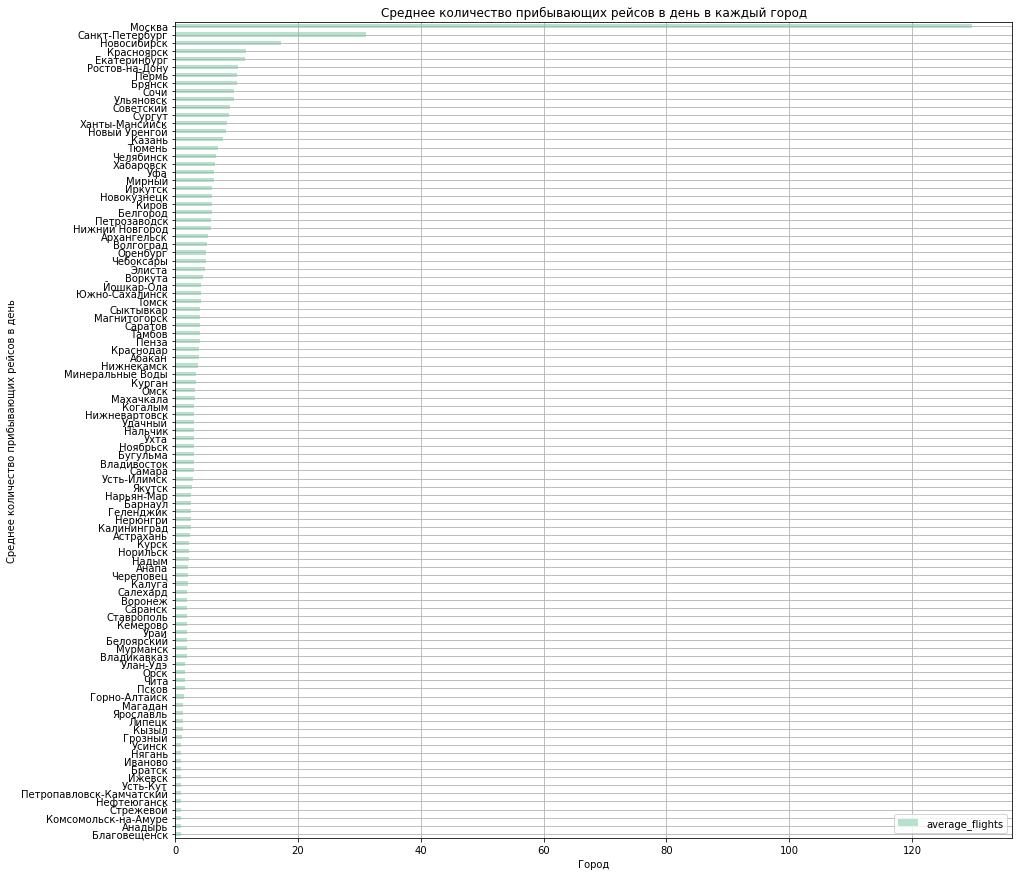

In [14]:
city.sort_values(by = 'average_flights').plot(y = 'average_flights', x = 'city',
                        figsize = (15, 15),
                        kind = 'barh', 
                        grid = True, 
                        cmap = 'Pastel2', 
                        title = 'Среднее количество прибывающих рейсов в день в каждый город')
plt.ylabel('Среднее количество прибывающих рейсов в день')
plt.xlabel('Город')
plt.xticks(rotation=0);

Так как исследуется список из 101 города, следовало ожидать, что график бужет не показательным. Поэтому в следующем подразделе будет изучен данный вопрос в разрезе топ-10 городов с наибольшим количеством прибывающих рейсов

### Сравнительный анализ количества прибывающих рейсов в день в каждый город из топ-10 с наибольшим количеством рейсов

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Москва'),
  Text(1, 0, 'Санкт-Петербург'),
  Text(2, 0, 'Новосибирск'),
  Text(3, 0, 'Красноярск'),
  Text(4, 0, 'Екатеринбург'),
  Text(5, 0, 'Ростов-на-Дону'),
  Text(6, 0, 'Пермь'),
  Text(7, 0, 'Брянск'),
  Text(8, 0, 'Сочи'),
  Text(9, 0, 'Ульяновск')])

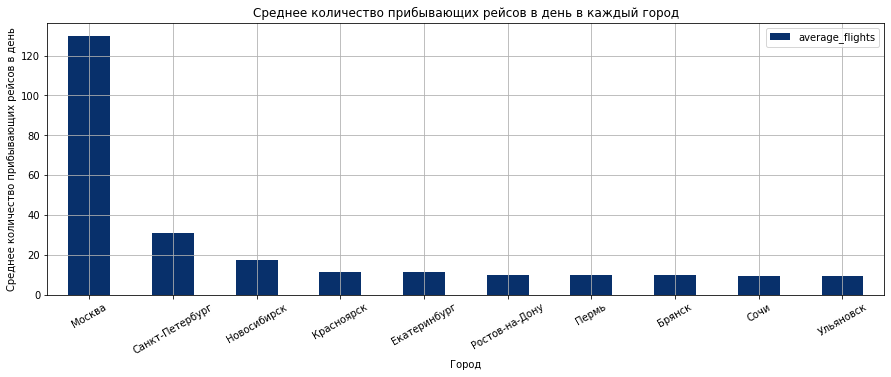

In [15]:
top10.plot(y = 'average_flights', x = 'city',
                        figsize = (15, 5),
                        kind = 'bar', 
                        grid = True, 
                        cmap = 'Blues_r', 
                        title = 'Среднее количество прибывающих рейсов в день в каждый город')
plt.ylabel('Среднее количество прибывающих рейсов в день')
plt.xlabel('Город')
plt.xticks(rotation=30)

Ожидаемо лидирующие места занимают 3 крупнейших города России: Москва с почти 130 прибывающими рейсами в день, Санкт-Петербург - 31 рейс, и Новосибирск - 17 рейсов. Также в список вошли Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск с примерно одинаковым дневным количеством прибывающих рейсов: от 9.6 до 11.6.

### Анализ местопроведения крупнейших фестивалей

Создадим парсер для сбора с сайта данных о 11 крупнейших фестивалях 2018 года. Данные сохранены в датафрейм festivals:

In [16]:
req = requests.get('https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html')
soup = BeautifulSoup(req.text, 'lxml')
heading_2=soup.find('h2')
paragraph=soup.find_all('p') 
table = soup.find('table',attrs={'id': 'best_festivals'})
heading_table = [] 
for row in table.find_all('th'): 
        heading_table.append(row.text)
content=[]
for row in table.find_all('tr'): 
    if not row.find_all('th'): 
            content.append([element.text for element in row.find_all('td')])
festivals = pd.DataFrame(content, columns=heading_table) 
festivals = festivals.rename({'Место проведения': 'city'}, axis=1)

display(festivals)

,Название фестиваля,city,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


Колонка c изначальным названием 'Место проведения' была переименована в 'city' для дальнейшего объединения с датафреймом 'city'

In [17]:
festivals.merge(city, how = 'inner')

,Название фестиваля,city,Дата проведения,average_flights
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018,11.322581
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018,5.870968
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018,31.161290
3,VK FEST,Санкт-Петербург,29.07.2018,31.161290
4,Доброфест,Ярославль,29.07.2018,1.322581
5,Park Live,Москва,28.07.2018,129.774194
6,Пикник Афиши,Москва,04.08.2018,129.774194
7,Видфест,Москва,08.09.2018,129.774194
8,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018,6.032258
9,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018,3.000000


In [18]:
city.query('city == "Тверь"')

,city,average_flights


В получившемся датафрейме отсутствует информация о рейсах в Тверь, хотя в ней проводится один из крупнейших фестивалей «Нашествие 2018»

## Вывод

В ходе данной работы был исследован спрос клиентов авиакомпании F9, покупающих билеты на те или иные направления.
Для этого была проанализирована информация о моделях самолетов, использующихся для перелетов пассажиров авиакомпании, и количество рейсов по каждой модели:
- Больше всего полетов у модели 'Cessna 208 Caravan'. Данная модель перевозит всего девять пассажиров и приспособлена для работы в сложных условиях, в том числе на грунтовых аэродромах, соответственно, можно предположить, что данные самолеты очень востребованы для обслуживания местных линий, поскольку стоимость перевозок на Ан-2, традиционно эксплуатировавшихся на этих маршрутах, возросла из-за высокой стоимости авиационного бензина. При этом самолет Cessna заправляется обычным авиационным керосином.
- Второе место у модели 'Bombardier CRJ-200', с пассажировместимостью всего до 50 человек.
- Замыкает тройку модель 'Sukhoi Superjet-100' - пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км.
- Почти в 4 раза меньше полетов у моделей самолетов 'Airbus' и 'Boeing'.

Также были проанализированы данные о среднедневном количестве прибывающих рейсов в каждый из более чем 100 городов.
Лидирующие места занимают 3 крупнейших города России: 
- Москва с почти 130 прибывающими рейсами в день, 
- Санкт-Петербург - 31 рейс, 
- Новосибирск - 17 рейсов,
- Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск с примерно одинаковым дневным количеством прибывающих рейсов: от 9.6 до 11.6.

Такое количество рейсов в Москву обуславливается, в первую очередь тем, что этот город является для многих маршрутов связной точкой, т.к. для многих городов нет прямой воздушной линии. Например, может быть сложно напрямую улететь из Иркутска в Брянск.

При анализе сводной таблицы из данных городах с проводимыми в них фестивалями и количестве рейсов в эти города можно сделать следующие выводы:
- Половина фестивалей проводится в Москве (3 мероприятия) и Санкт-Петербурге (2 мероприятия). Так как эти города занимают лидирующие позиции в списке городов с наибольшим количеством прибывающих рейсов, соответственно, все в порядке.
- В Екатеринбурге, Нижнем Новгороде и Иркутске было по 1 фестивалю. Также следует отметить, что в эти города прибывает в среднем от ~ 6 до ~ 11 рейсов в день.
- Такие города как Ярославль и Владивосток также были местами проведения крупных фестивалей в сентябре 2018 года, однако, в них прибывает достаточно мало рейсов: ~ 1 и 3 рейса соответственно. Необходимо проанализировать спрос пассажиров на данные направления и в случае выявления потребности, добавить рейсы в вышеуказанные города для увеличения прибыли авиакомпании.
- Тверь также стала местом проведения фестиваля «Нашествие 2018», однако у авиакомпании F9 отсутствуют рейсы по данному направлению. Можно сделать вывод, что компания упускает выручку по данному направлению и следует изучить более имеет ли смысл создавать рейс в данный город.

При наличии дополнительных данных не только о месте прибытия, но и о месте отбытия самолета, можно выполнить анализ и привести рекомендации по эксплуатации моделей самолетов. В данной ситуации это сделать проблематично, так как даже модели самолетов из лидирующей тройки с наибольшим количеством полетов разительно отличаются друг от друга не только расстоянием полета, но и пассажировместимостью.